This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.6180 - accuracy: 0.8138 - val_loss: 0.2657 - val_accuracy: 0.9218
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2452 - accuracy: 0.9242 - val_loss: 0.1892 - val_accuracy: 0.9410
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1621 - accuracy: 0.9498 - val_loss: 0.1760 - val_accuracy: 0.9463
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1157 - accuracy: 0.9635 - val_loss: 0.1544 - val_accuracy: 0.9554
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0846 - accuracy: 0.9732 - val_loss: 0.2015 - val_accuracy: 0.9452
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0612 - accuracy: 0.9803 - val_loss: 0.1298 - val_accuracy: 0.9660
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0470 - accuracy: 0.9845 - val_loss: 0.1380 - val_accuracy: 0.9649
Epoch 

**Plotting a validation accuracy comparison**

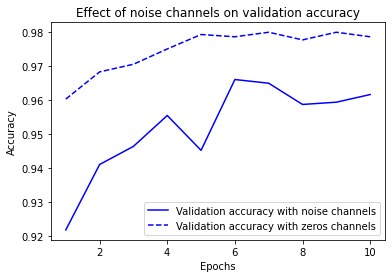

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=10,#100>>10
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 2.3174 - accuracy: 0.1025 - val_loss: 2.3057 - val_accuracy: 0.1032
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 2.2996 - accuracy: 0.1195 - val_loss: 2.3128 - val_accuracy: 0.1093
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2900 - accuracy: 0.1309 - val_loss: 2.3133 - val_accuracy: 0.1068
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2754 - accuracy: 0.1444 - val_loss: 2.3283 - val_accuracy: 0.1080
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2578 - accuracy: 0.1574 - val_loss: 2.3426 - val_accuracy: 0.1052
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 2.2346 - accuracy: 0.1716 - val_loss: 2.3549 - val_accuracy: 0.1003
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.2101 - accuracy: 0.1887 - val_loss: 2.3632 - val_accuracy: 0.1074
Epoch 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1114.8463 - accuracy: 0.3971 - val_loss: 2.2855 - val_accuracy: 0.2476
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 6.5312 - accuracy: 0.2734 - val_loss: 2.1716 - val_accuracy: 0.2609
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 3.1906 - accuracy: 0.2645 - val_loss: 2.8611 - val_accuracy: 0.3131
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 2.8888 - accuracy: 0.2493 - val_loss: 2.0956 - val_accuracy: 0.2380
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 2.6891 - accuracy: 0.2537 - val_loss: 2.3662 - val_accuracy: 0.2946
Epoch 6/10
375/375 [==============================] - 3s 7ms/step - loss: 2.6496 - accuracy: 0.2561 - val_loss: 2.1455 - val_accuracy: 0.2642
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 2.4842 - accuracy: 0.2608 - val_loss: 2.1296 - val_accuracy: 0.2372
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3390 - accuracy: 0.9129 - val_loss: 0.1853 - val_accuracy: 0.9510
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1401 - accuracy: 0.9631 - val_loss: 0.1698 - val_accuracy: 0.9615
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1153 - accuracy: 0.9743 - val_loss: 0.1504 - val_accuracy: 0.9716
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0977 - accuracy: 0.9781 - val_loss: 0.1827 - val_accuracy: 0.9690
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0856 - accuracy: 0.9826 - val_loss: 0.2136 - val_accuracy: 0.9703
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0792 - accuracy: 0.9844 - val_loss: 0.2064 - val_accuracy: 0.9728
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0711 - accuracy: 0.9866 - val_loss: 0.2578 - val_accuracy: 0.9740
Epoch

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6700 - accuracy: 0.8295 - val_loss: 0.3582 - val_accuracy: 0.9042
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3508 - accuracy: 0.9035 - val_loss: 0.3069 - val_accuracy: 0.9145
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3154 - accuracy: 0.9121 - val_loss: 0.2924 - val_accuracy: 0.9175
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2991 - accuracy: 0.9165 - val_loss: 0.2813 - val_accuracy: 0.9228
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2894 - accuracy: 0.9193 - val_loss: 0.2764 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2828 - accuracy: 0.9211 - val_loss: 0.2723 - val_accuracy: 0.9246
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2779 - accuracy: 0.9225 - val_loss: 0.2689 - val_accuracy: 0.9273
Epoch 

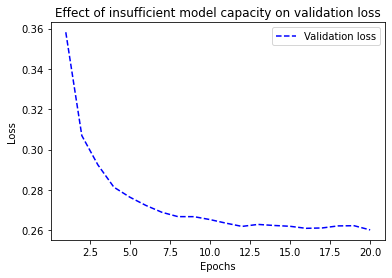

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 4s 8ms/step - loss: 0.3670 - accuracy: 0.8965 - val_loss: 0.2074 - val_accuracy: 0.9386
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1542 - accuracy: 0.9541 - val_loss: 0.1239 - val_accuracy: 0.9628
Epoch 3/20
375/375 [==============================] - 3s 8ms/step - loss: 0.1073 - accuracy: 0.9672 - val_loss: 0.1076 - val_accuracy: 0.9678
Epoch 4/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.0934 - val_accuracy: 0.9718
Epoch 5/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0944 - val_accuracy: 0.9725
Epoch 6/20
375/375 [==============================] - 3s 8ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0962 - val_accuracy: 0.9724
Epoch 7/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0848 - val_accuracy: 0.9758
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\ddwu0\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\ddwu0\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

Epoch 1/20
30/30 [==============================] - 7s 166ms/step - loss: 0.5134 - accuracy: 0.7915 - val_loss: 0.3917 - val_accuracy: 0.8675
Epoch 2/20
30/30 [==============================] - 3s 95ms/step - loss: 0.3054 - accuracy: 0.9032 - val_loss: 0.3260 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2253 - accuracy: 0.9266 - val_loss: 0.2859 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1785 - accuracy: 0.9422 - val_loss: 0.2768 - val_accuracy: 0.8886
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1466 - accuracy: 0.9534 - val_loss: 0.2787 - val_accuracy: 0.8888
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1205 - accuracy: 0.9633 - val_loss: 0.3091 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1007 - accuracy: 0.9709 - val_loss: 0.3063 - val_accuracy: 0.8854
Epoch 8/20
3

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5841 - accuracy: 0.7809 - val_loss: 0.4940 - val_accuracy: 0.8521
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4302 - accuracy: 0.8781 - val_loss: 0.4053 - val_accuracy: 0.8635
Epoch 3/20
30/30 [==============================] - 2s 66ms/step - loss: 0.3418 - accuracy: 0.8989 - val_loss: 0.3467 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2814 - accuracy: 0.9151 - val_loss: 0.3107 - val_accuracy: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2379 - accuracy: 0.9261 - val_loss: 0.3013 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2065 - accuracy: 0.9371 - val_loss: 0.2804 - val_accuracy: 0.8907
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1815 - accuracy: 0.9441 - val_loss: 0.2753 - val_accuracy: 0.8913
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 78ms/step - loss: 0.5365 - accuracy: 0.7603 - val_loss: 0.4617 - val_accuracy: 0.7830
Epoch 2/20
30/30 [==============================] - 2s 60ms/step - loss: 0.2628 - accuracy: 0.8965 - val_loss: 0.3023 - val_accuracy: 0.8771
Epoch 3/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1640 - accuracy: 0.9409 - val_loss: 0.4555 - val_accuracy: 0.8298
Epoch 4/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0812 - accuracy: 0.9714 - val_loss: 0.3615 - val_accuracy: 0.8902
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0914 - accuracy: 0.9749 - val_loss: 0.3995 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.0519 - accuracy: 0.9873 - val_loss: 0.4711 - val_accuracy: 0.8567
Epoch 7/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.5094 - val_accuracy: 0.8850
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 7s 181ms/step - loss: 0.6163 - accuracy: 0.7779 - val_loss: 0.4957 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 3s 106ms/step - loss: 0.4225 - accuracy: 0.8923 - val_loss: 0.4041 - val_accuracy: 0.8832
Epoch 3/20
30/30 [==============================] - 4s 124ms/step - loss: 0.3531 - accuracy: 0.9094 - val_loss: 0.3770 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 3s 116ms/step - loss: 0.3135 - accuracy: 0.9214 - val_loss: 0.3719 - val_accuracy: 0.8849s:
Epoch 5/20
30/30 [==============================] - 3s 113ms/step - loss: 0.2940 - accuracy: 0.9284 - val_loss: 0.3600 - val_accuracy: 0.8883
Epoch 6/20
30/30 [==============================] - 3s 107ms/step - loss: 0.2799 - accuracy: 0.9317 - val_loss: 0.3600 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 3s 94ms/step - loss: 0.2649 - accuracy: 0.9391 - val_loss: 0.3624 - val_accuracy: 0.8860
Epoch

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 12s 154ms/step - loss: 0.6616 - accuracy: 0.5892 - val_loss: 0.5670 - val_accuracy: 0.8346 - accu
Epoch 2/20
30/30 [==============================] - 2s 72ms/step - loss: 0.5718 - accuracy: 0.7063 - val_loss: 0.4497 - val_accuracy: 0.8690
Epoch 3/20
30/30 [==============================] - 2s 79ms/step - loss: 0.4834 - accuracy: 0.7821 - val_loss: 0.3852 - val_accuracy: 0.8783
Epoch 4/20
30/30 [==============================] - 2s 71ms/step - loss: 0.4179 - accuracy: 0.8218 - val_loss: 0.3259 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 2s 63ms/step - loss: 0.3693 - accuracy: 0.8504 - val_loss: 0.2971 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3286 - accuracy: 0.8764 - val_loss: 0.2837 - val_accuracy: 0.8908
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2915 - accuracy: 0.8944 - val_loss: 0.2756 - val_accuracy: 0.8934
Epoc

## Summary